In [1]:
import seaborn as sns
import matplotlib.font_manager

from scripts.path_utils import *
import scripts.fourier_utils as fourier_utils
import scripts.config as sconfig
from scripts.enums import Columns, Clusters, ContentType

In [2]:
sns.set(rc={'figure.figsize':(7,5),
            'axes.facecolor':'white',
            'axes.edgecolor': 'black',
            'axes.spines.top': False,
            'axes.spines.right': False,
            'figure.facecolor':'white',
            'font.family': 'Helvetica',
            'xtick.bottom': True,
            'ytick.left': True,
            'xtick.color': 'black',
            'ytick.color': 'black',
            'legend.frameon': False
            })

In [3]:
FREQ=.25
colormap = {i:c for i, c in zip(fourier_utils.similarity_measures.keys(), sns.color_palette("tab10", len(fourier_utils.similarity_measures)))}
config = sconfig.Config(date_from = '2020-01-22')
country_config = sconfig.CountryConfig(LABEL='DEU', TIME_ZONE='Europe/Berlin')
TYPE='all'

# Activity

In [4]:
activity_path_manager = ActivityPathManager(config, country_config.LABEL, TYPE)
activity_decomposer = fourier_utils.Decomposer(Columns.ACTIVITY_WEIGHTED.value, Columns.CLUSTER.value, list(Clusters) + ['total'], list(Clusters), activity_path_manager)

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


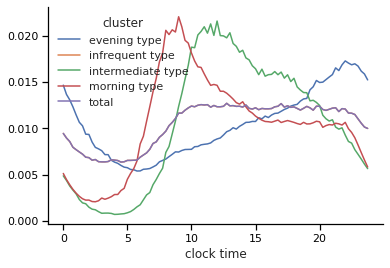

In [5]:
import matplotlib.font_manager
activity_decomposer.signal_df.unstack(level='cluster')['activity_weighted'].plot();

In [6]:
nmax_per_cluster=activity_decomposer.get_nmax_per_cluster()
nmax_per_cluster

{'infrequent type': 3,
 'morning type': 3,
 'intermediate type': 4,
 'evening type': 3,
 'total': 3}

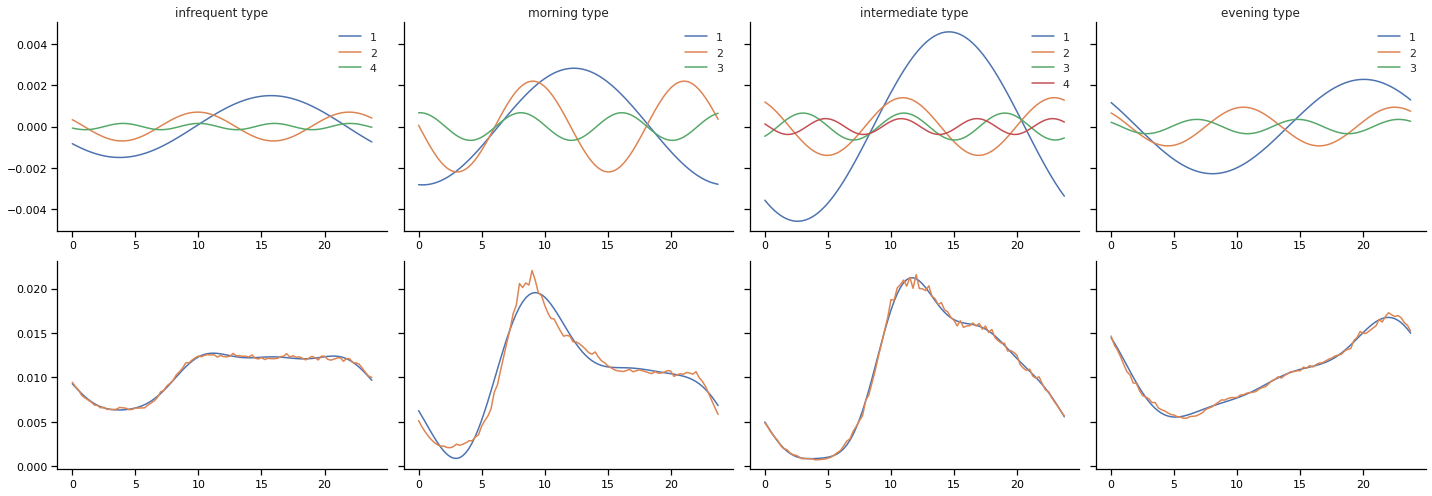

In [7]:
cluster_params_activity, cluster_recomb_activity = activity_decomposer.recombine_n_largest_frequencies(nmax_per_cluster)

<p id="SupplTab13">Supplementary Table 13:</p>

In [8]:
waking_times = activity_decomposer.get_and_store_waking_times(cluster_recomb_activity)
waking_times

{'infrequent type': (8.0, 0.0),
 'morning type': (6.0, 22.0),
 'intermediate type': (7.75, 23.75),
 'evening type': (10.5, 2.5),
 'total': (8.0, 0.0)}

<p id="SupplTab14">Supplementary Table 14:</p>

In [9]:
activity_stats = activity_decomposer.get_and_store_stats(cluster_recomb_activity, waking_times)
activity_stats.loc[list(Clusters)]

max                                  min  \
                    clock time hrs past waking  activity clock time   
cluster           i                                                   
infrequent type   0      11.25            3.25  0.012726       3.75   
                  1      20.75           12.75  0.012399      18.25   
                  2      15.75            7.75  0.012311      14.00   
morning type      0       9.25            3.25  0.019559       3.00   
intermediate type 0      11.75            4.00  0.021233       3.50   
evening type      0      22.00           11.50  0.016765       5.00   

                                               
                    hrs past waking  activity  
cluster           i                            
infrequent type   0           19.75  0.006325  
                  1           10.25  0.012089  
                  2            6.00  0.012208  
morning type      0           21.00  0.000860  
intermediate type 0           19.75  0.000833  
evening type      0           18.50  0.005525

In [10]:
activity_recomb = pd.DataFrame(cluster_recomb_activity.stack(), columns=[activity_decomposer.y_col])
activity_recomb.index.names = ['clock time', 'cluster']
activity_recomb.reset_index()
fourier_utils.align_signal_by_waking(activity_recomb, waking_times)
fourier_utils.align_signal_by_waking(activity_decomposer.signal_df, waking_times)

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<AxesSubplot:ylabel='activity (factor of mean)'>

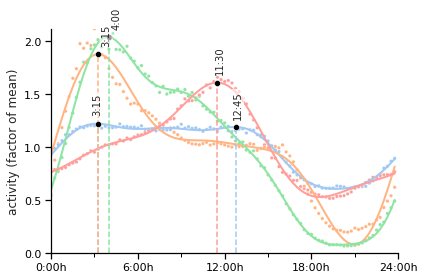

In [11]:
import matplotlib.font_manager
activity_decomposer.plot_aligned(activity_recomb, activity_stats, by="hrs past waking", factor_of_baseline=True, hatch_area=False, ampm=False)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<AxesSubplot:ylabel='activity (factor of mean)'>

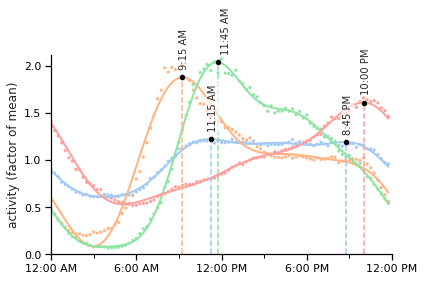

In [12]:
activity_decomposer.plot_aligned(activity_recomb, activity_stats, by="clock time", factor_of_baseline=True, hatch_area=False, ampm=True)

# Ratio of potentially machinated content

In [13]:
ratio_path_manager = MachinatedPathManager(config, country_config.LABEL, TYPE)
ratio_decomposer = fourier_utils.Decomposer(Columns.RATIO_BY_USER.value, Columns.CLUSTER.value, list(Clusters) + ['total'], list(Clusters), ratio_path_manager)
ratio_decomposer.smooth_over_signal()

In [14]:
nmax_per_cluster=ratio_decomposer.get_nmax_per_cluster(n=(1,3))
nmax_per_cluster

{'infrequent type': 2,
 'morning type': 2,
 'intermediate type': 2,
 'evening type': 2,
 'total': 2}

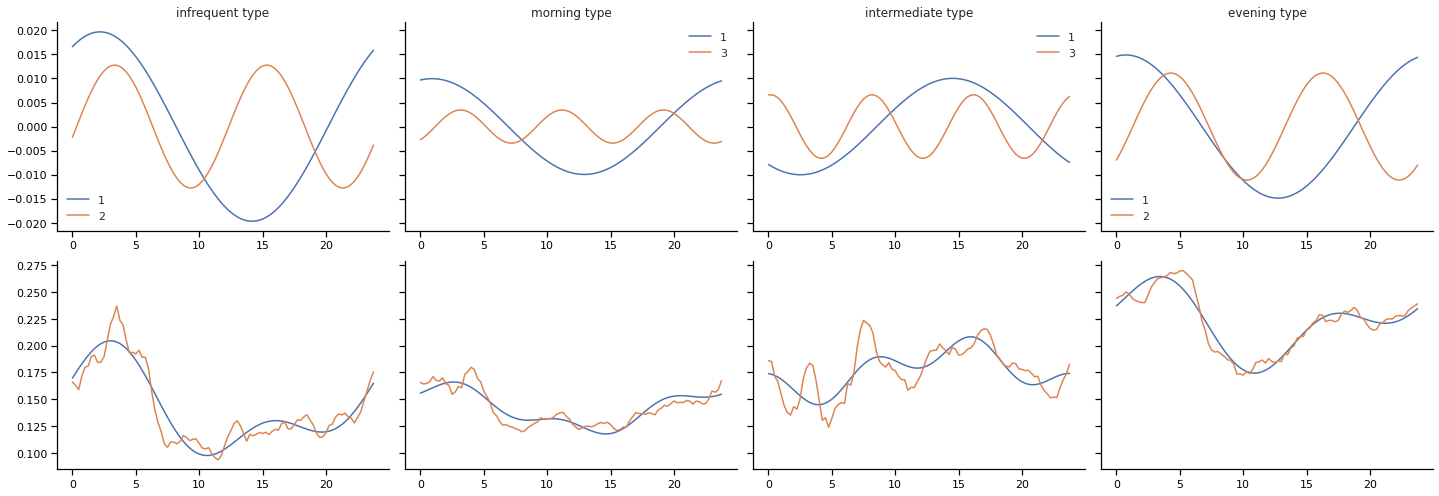

In [15]:
cluster_params_ratio, cluster_recomb_ratio = ratio_decomposer.recombine_n_largest_frequencies(nmax_per_cluster)

<p id="SupplTab15">Supplementary Table 15:</p>

In [16]:
ratio_stats = ratio_decomposer.get_and_store_stats(cluster_recomb_ratio, waking_times)
ratio_stats.loc[list(Clusters)]

max                                   min  \
                    clock time hrs past waking machinated clock time   
cluster           i                                                    
infrequent type   0       3.00           19.00   0.204549      10.50   
                  1      16.00            8.00   0.129971      19.75   
morning type      0       2.50           20.50   0.166036      14.50   
                  1      20.50           14.50   0.153277       8.50   
                  2      10.25            4.25   0.131759      22.25   
intermediate type 0      16.00            8.25   0.208287       4.00   
                  1       8.75            1.00   0.189629      20.75   
                  2        NaN             NaN        NaN      11.75   
evening type      0       3.50           17.00   0.264597      11.00   
                  1      17.50            7.00   0.230257      21.25   

                                                
                    hrs past waking machinated  
cluster           i                             
infrequent type   0            2.50   0.097440  
                  1           11.75   0.119298  
morning type      0            8.50   0.117596  
                  1            2.50   0.130355  
                  2           16.25   0.151873  
intermediate type 0           20.25   0.144874  
                  1           13.00   0.163532  
                  2            4.00   0.179020  
evening type      0            0.50   0.174374  
                  1           10.75   0.220944

In [17]:
cluster_recomb_ratio

,infrequent type,morning type,intermediate type,evening type,total
0.00,0.169619,0.155669,0.173912,0.237117,0.169650
0.25,0.174260,0.156863,0.173247,0.239819,0.174289
0.50,0.178772,0.158148,0.172145,0.242593,0.178800
0.75,0.183095,0.159482,0.170624,0.245393,0.183121
1.00,0.187165,0.160816,0.168720,0.248172,0.187190
...,...,...,...,...,...
22.75,0.146637,0.152065,0.171354,0.226010,0.146676
23.00,0.151009,0.152420,0.172498,0.227804,0.151047
23.25,0.155549,0.152964,0.173387,0.229839,0.155585
23.50,0.160203,0.153695,0.173953,0.232090,0.160237


In [18]:
ratio_recomb = pd.DataFrame(cluster_recomb_ratio.stack(), columns=[ratio_decomposer.y_col])
ratio_recomb.index.names = ['clock time', 'cluster']
ratio_recomb.reset_index()
fourier_utils.align_signal_by_waking(ratio_recomb, waking_times)
fourier_utils.align_signal_by_waking(ratio_decomposer.signal_df, waking_times)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<AxesSubplot:ylabel='machinated'>

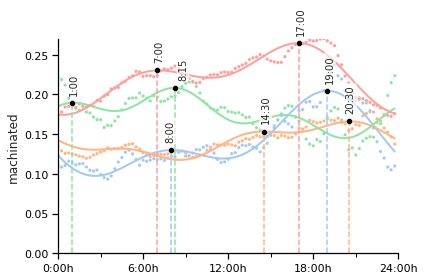

In [19]:
ratio_decomposer.plot_aligned(ratio_recomb, ratio_stats, by="hrs past waking", factor_of_baseline=False, hatch_area=False, ampm=False)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<AxesSubplot:ylabel='machinated'>

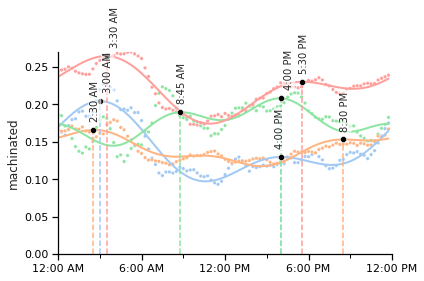

In [20]:
ratio_decomposer.plot_aligned(ratio_recomb, ratio_stats, by="clock time", factor_of_baseline=False, hatch_area=False, ampm=True)

In [21]:
activity_path_manager.save(activity_recomb, "fourier")
ratio_path_manager.save(ratio_recomb, "fourier")

In [22]:
import pickle
with open(get_waking_time_path(config, country_config, TYPE), 'wb') as f:
    pickle.dump(waking_times, f, pickle.HIGHEST_PROTOCOL)

# Germany unverified

In [23]:
activity_path_manager_unverified = ActivityPathManager(config, country_config.LABEL, user_type='unverified')
ratio_path_manager_unverified = MachinatedPathManager(config, country_config.LABEL, user_type='unverified')

In [24]:
activity_decomposer_unverified = fourier_utils.Decomposer(Columns.ACTIVITY_WEIGHTED.value, Columns.CLUSTER.value, list(Clusters) + ['total'],  list(Clusters), activity_path_manager_unverified)
ratio_decomposer_unverified = fourier_utils.Decomposer(Columns.RATIO_BY_USER.value, Columns.CLUSTER.value, list(Clusters) + ['total'],  list(Clusters), ratio_path_manager_unverified)
ratio_decomposer_unverified.smooth_over_signal()

{'infrequent type': (8.0, 0.0),
 'morning type': (6.5, 22.5),
 'intermediate type': (9.0, 1.0),
 'evening type': (15.5, 7.5),
 'total': (8.0, 0.0)}

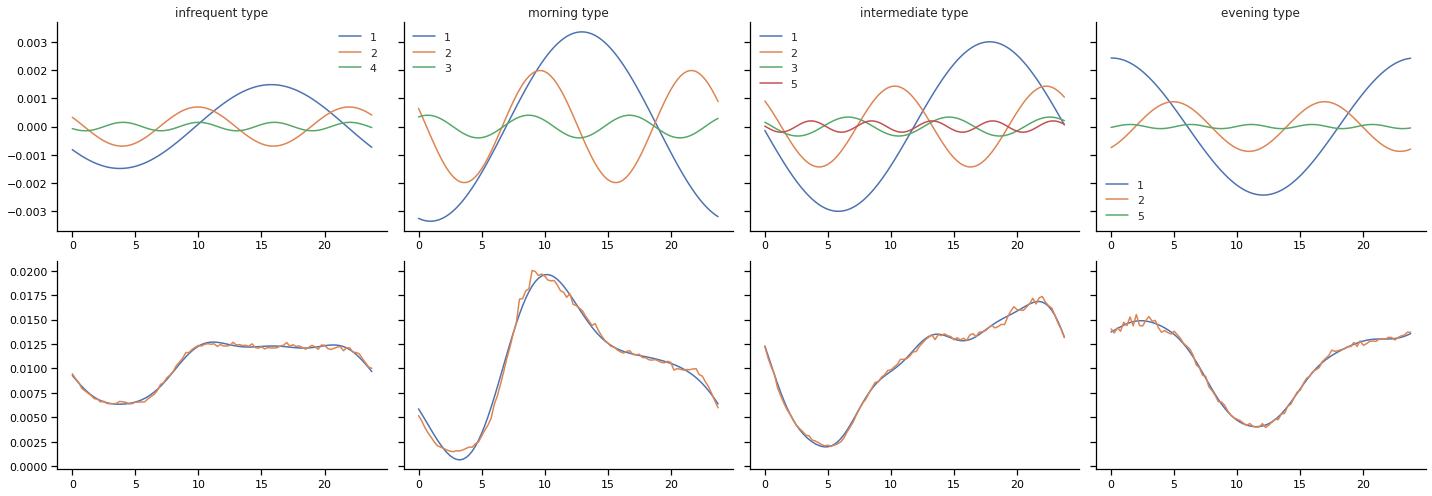

In [25]:
nmax_per_cluster_unverified = activity_decomposer_unverified.get_nmax_per_cluster()
cluster_params_activity_unverified, cluster_recomb_activity_unverified = activity_decomposer_unverified.recombine_n_largest_frequencies(nmax_per_cluster_unverified)
waking_times_unverified = activity_decomposer_unverified.get_and_store_waking_times(cluster_recomb_activity_unverified)
waking_times_unverified

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<AxesSubplot:ylabel='activity (factor of mean)'>

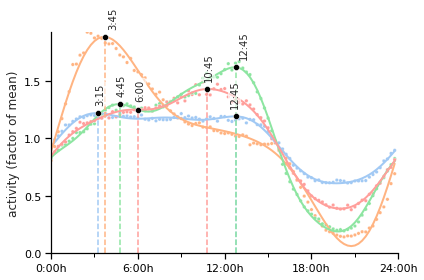

In [26]:
activity_stats_unverified = activity_decomposer_unverified.get_and_store_stats(cluster_recomb_activity_unverified, waking_times_unverified)
activity_recomb_unverified = pd.DataFrame(cluster_recomb_activity_unverified.stack(), columns=[activity_decomposer_unverified.y_col])
activity_recomb_unverified.index.names = ['clock time', 'cluster']
fourier_utils.align_signal_by_waking(activity_recomb_unverified, waking_times_unverified)
fourier_utils.align_signal_by_waking(activity_decomposer_unverified.signal_df, waking_times_unverified)
activity_decomposer_unverified.plot_aligned(activity_recomb_unverified, activity_stats_unverified, by="hrs past waking", factor_of_baseline=True,
                                 hatch_area=False, ampm=False)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<AxesSubplot:ylabel='activity (factor of mean)'>

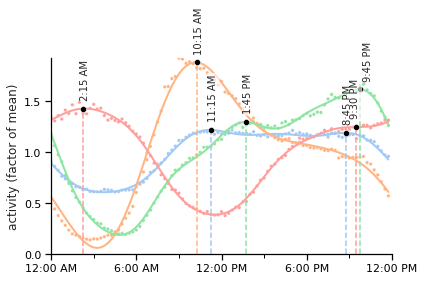

In [27]:
activity_decomposer_unverified.plot_aligned(activity_recomb_unverified, activity_stats_unverified, by="clock time", factor_of_baseline=True,
                                            hatch_area=False, ampm=True)

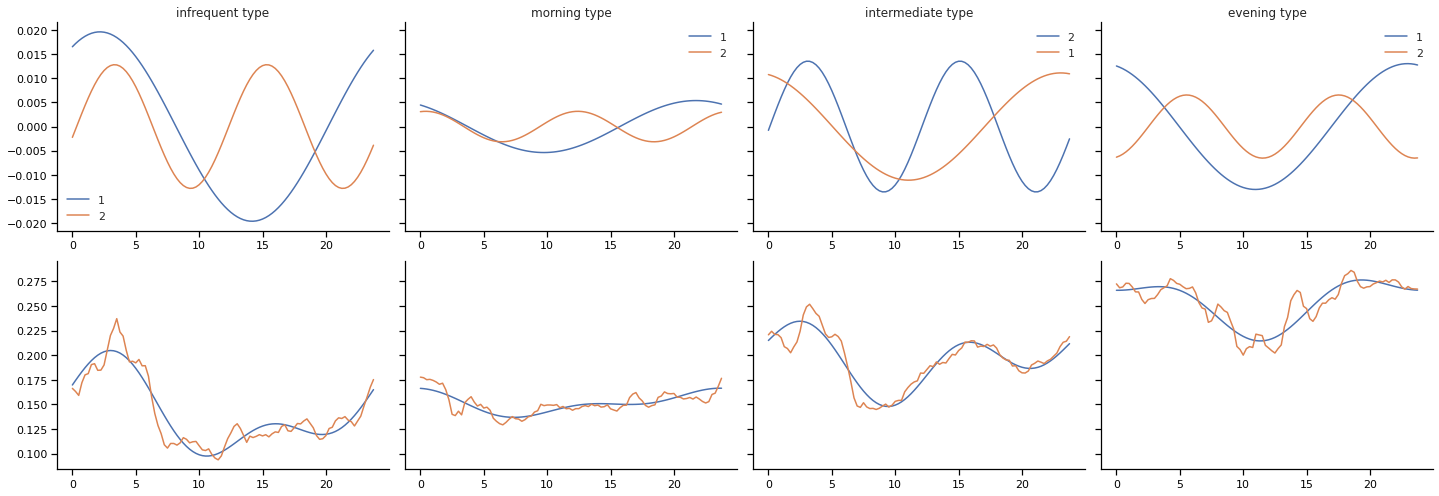

In [28]:
# Ratio of potentially machinated content
nmax_per_cluster_unverified = ratio_decomposer_unverified.get_nmax_per_cluster(n=(1, 3))
cluster_params_ratio_unverified, cluster_recomb_ratio_unverified = ratio_decomposer_unverified.recombine_n_largest_frequencies(nmax_per_cluster_unverified)
ratio_stats_unverified = ratio_decomposer_unverified.get_and_store_stats(cluster_recomb_ratio_unverified, waking_times_unverified)

In [29]:
ratio_recomb_unverified = pd.DataFrame(cluster_recomb_ratio_unverified.stack(), columns=[ratio_decomposer_unverified.y_col])
ratio_recomb_unverified.index.names = ['clock time', 'cluster']
ratio_recomb_unverified.reset_index()
fourier_utils.align_signal_by_waking(ratio_recomb_unverified, waking_times_unverified)
fourier_utils.align_signal_by_waking(ratio_decomposer_unverified.signal_df, waking_times_unverified)

In [30]:
ratio_recomb

ratio_norm  hrs past waking
clock time cluster                                       
0.00       infrequent type      0.169619            16.00
           morning type         0.155669            18.00
           intermediate type    0.173912            16.25
           evening type         0.237117            13.50
           total                0.169650            16.00
...                                  ...              ...
23.75      infrequent type      0.164913            15.75
           morning type         0.154604            17.75
           intermediate type    0.174141            16.00
           evening type         0.234527            13.25
           total                0.164946            15.75

[480 rows x 2 columns]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


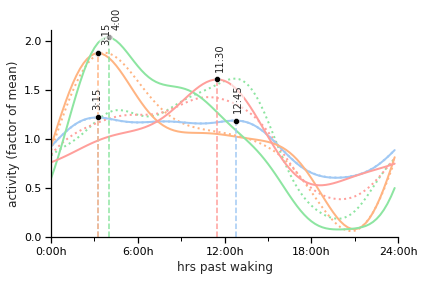

In [31]:
activity_args = dict(
    scatter_df_A = activity_decomposer_unverified.signal_df,
    line_df_A = activity_recomb_unverified,
    stats_A = activity_stats_unverified,
    scatter_df_B = activity_decomposer.signal_df,
    line_df_B = activity_recomb,
    stats_B = activity_stats,
    c_col=Columns.CLUSTER.value,
    y_col=Columns.ACTIVITY_WEIGHTED.value,
    consider_clusters=list(Clusters),
    kwargs_A=dict(scatter_alpha=0, ylabel="activity (factor of mean)", annotate=0),
    kwargs_B=dict(scatter_alpha=0, ylabel="activity (factor of mean)", annotate=2))

g = fourier_utils.plot_difference(**activity_args, usex="hrs past waking")

g.get_figure().savefig(
   f"{config.SAVE_ROOT_DIR}{country_config.LABEL}_comparison_activity_after_waking_unverified_vs_all.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


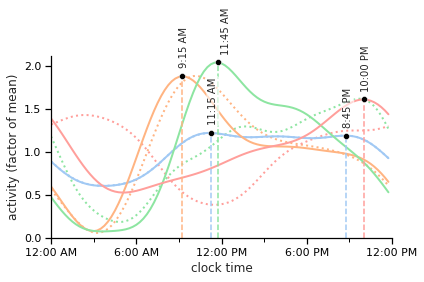

In [32]:
g = fourier_utils.plot_difference(**activity_args, usex="clock time")

g.get_figure().savefig(
    f"{config.SAVE_ROOT_DIR}{country_config.LABEL}_comparison_activity_clock_time_unverified_vs_all.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


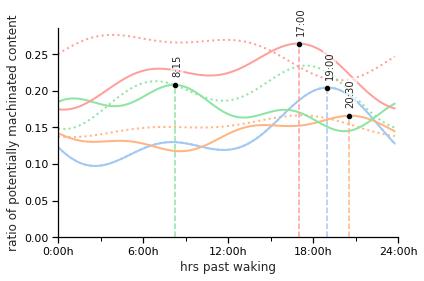

In [33]:
ratio_args = dict(
    scatter_df_A = ratio_decomposer_unverified.signal_df,
    line_df_A = ratio_recomb_unverified,
    stats_A = ratio_stats_unverified,
    scatter_df_B = ratio_decomposer.signal_df,
    line_df_B = ratio_recomb,
    stats_B = ratio_stats,
    c_col=Columns.CLUSTER.value,
    y_col=Columns.RATIO_BY_USER.value,
    consider_clusters=list(Clusters),
    kwargs_A=dict(scatter_alpha=0, ylabel="ratio of potentially machinated content", annotate=0),
    kwargs_B=dict(scatter_alpha=0, ylabel="ratio of potentially machinated content", annotate=1))

g = fourier_utils.plot_difference(**ratio_args, usex="hrs past waking", adjust_to_baseline=False)

g.get_figure().savefig(
    f"{config.SAVE_ROOT_DIR}{country_config.LABEL}_comparison_ratio_after_waking_unverified_vs_all.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


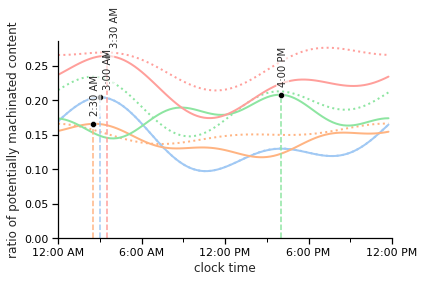

In [34]:
g = fourier_utils.plot_difference(**ratio_args, usex="clock time", adjust_to_baseline=False)

g.get_figure().savefig(
    f"{config.SAVE_ROOT_DIR}{country_config.LABEL}_comparison_ratio_clock_time_unverified_vs_all.eps")

In [35]:
activity_path_manager_unverified.save(activity_recomb, "fourier")
ratio_path_manager_unverified.save(ratio_recomb, "fourier")
with open(get_waking_time_path(config, country_config, 'unverified'), 'wb') as f:
    pickle.dump(waking_times_unverified, f, pickle.HIGHEST_PROTOCOL)

# Germany VS Italy

In [36]:
ita_config = sconfig.CountryConfig(LABEL='ITA', TIME_ZONE='Europe/Rome')
ita_type='all'
italy = fourier_utils.load_activity_ratio_type(config, ita_config, ita_type, activity_decomposer, ratio_decomposer, list(Clusters)+['total'])

<p id="SupplFig1a">Supplementary Figure 1a: activity by waking time</p>

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


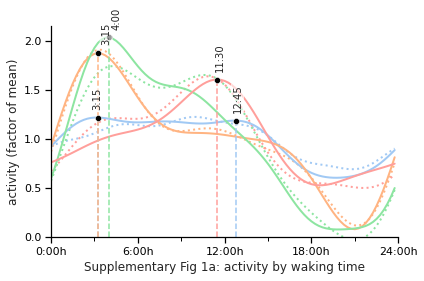

In [37]:
activity_args = dict(
    scatter_df_A = italy.activity,
    line_df_A = italy.activity_smoothed,
    stats_A = italy.stats_activity,
    scatter_df_B = activity_decomposer.signal_df,
    line_df_B = activity_recomb,
    stats_B = activity_stats,
    c_col=Columns.CLUSTER.value,
    y_col=Columns.ACTIVITY_WEIGHTED.value,
    consider_clusters=list(Clusters),
    kwargs_A=dict(scatter_alpha=0, ylabel="activity (factor of mean)", annotate=0),
    kwargs_B=dict(scatter_alpha=0, ylabel="activity (factor of mean)", annotate=2))

g = fourier_utils.plot_difference(**activity_args, usex="hrs past waking")
g.set_xlabel("")
g.get_figure().savefig(
    f"{config.SAVE_ROOT_DIR}{country_config.LABEL}_comparison_activity_after_waking_Germany_vs_Italy_{ita_type}.eps")
g.set_xlabel("Supplementary Fig 1a: activity by waking time");

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


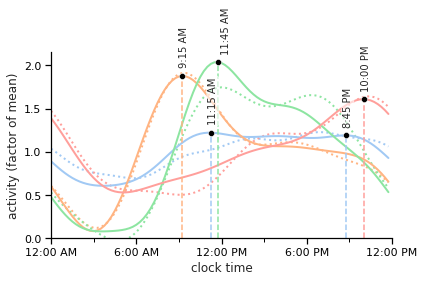

In [38]:
g =  fourier_utils.plot_difference(**activity_args, usex="clock time")

g.get_figure().savefig(
    f"{config.SAVE_ROOT_DIR}{country_config.LABEL}_comparison_activity_clocktime_Germany_vs_Italy_{ita_type}.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


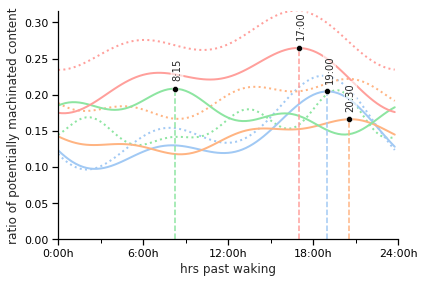

In [39]:
shared_dict = dict(scatter_alpha=0, ylabel="ratio of potentially machinated content")
ratio_args = dict(
    scatter_df_A = italy.ratio_smoothed,
    line_df_A = italy.ratio_smoothed,
    stats_A = italy.stats_ratio,
    scatter_df_B = ratio_decomposer.signal_df,
    line_df_B = ratio_recomb,
    stats_B = ratio_stats,
    c_col=Columns.CLUSTER.value,
    y_col=Columns.RATIO_BY_USER.value,
    consider_clusters=list(Clusters),
    kwargs_A=shared_dict | dict(annotate=0),
    kwargs_B=shared_dict | dict(annotate=1),
    adjust_to_baseline=False)

g =  fourier_utils.plot_difference(**ratio_args, usex="hrs past waking")

g.get_figure().savefig(
    f"{config.SAVE_ROOT_DIR}{country_config.LABEL}_comparison_ratio_after_waking_Germany_vs_Italy_{ita_type}.eps")

<p id="SupplFig1b">Supplementary Figure 1b: ratio time of day</p>

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


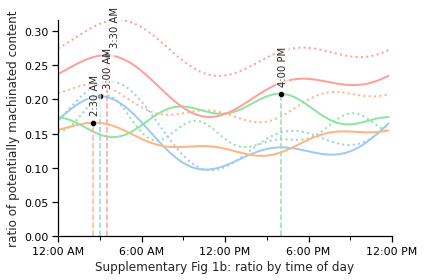

In [40]:
g =  fourier_utils.plot_difference(**ratio_args, usex="clock time")
g.set_xlabel("")

g.get_figure().savefig(
    f"{config.SAVE_ROOT_DIR}{country_config.LABEL}_comparison_ratio_clocktime_Germany_vs_Italy_{ita_type}.eps")
g.set_xlabel("Supplementary Fig 1b: ratio by time of day");

## Unverified

In [41]:
ita_config = sconfig.CountryConfig(LABEL='ITA', TIME_ZONE='Europe/Rome')
ita_type = 'unverified'
italy_unverified = fourier_utils.load_activity_ratio_type(config, ita_config, 'unverified', activity_decomposer_unverified, ratio_decomposer_unverified, list(Clusters)+['total'])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


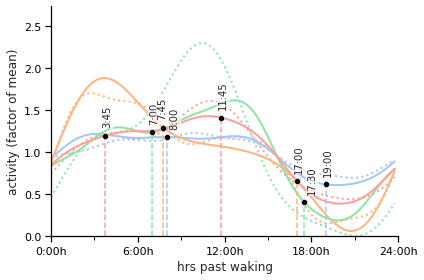

In [42]:
activity_args = dict(
    scatter_df_A = italy_unverified.activity,
    line_df_A = italy_unverified.activity_smoothed,
    stats_A = italy_unverified.stats_activity,
    scatter_df_B = activity_decomposer_unverified.signal_df,
    line_df_B = activity_recomb_unverified,
    stats_B = ratio_stats_unverified,
    c_col=Columns.CLUSTER.value,
    y_col=Columns.ACTIVITY_WEIGHTED.value,
    consider_clusters=list(Clusters),
    kwargs_A=dict(scatter_alpha=0, ylabel="activity (factor of mean)", annotate=0),
    kwargs_B=dict(scatter_alpha=0, ylabel="activity (factor of mean)", annotate=2))

g = fourier_utils.plot_difference(**activity_args, usex="hrs past waking")

g.get_figure().savefig(
    f"{config.SAVE_ROOT_DIR}{country_config.LABEL}_comparison_activity_after_waking_Germany_vs_Italy_{ita_type}.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


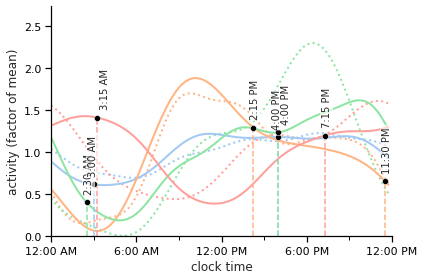

In [43]:
g =  fourier_utils.plot_difference(**activity_args, usex="clock time")

g.get_figure().savefig(
    f"{config.SAVE_ROOT_DIR}{country_config.LABEL}_comparison_activity_clock_time_Germany_vs_Italy_{ita_type}.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


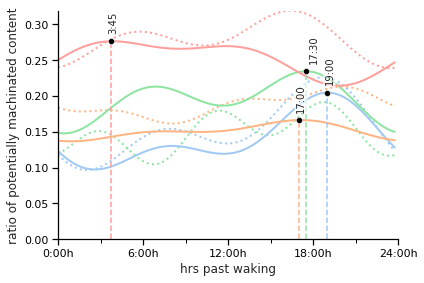

In [44]:
ratio_args = dict(
    scatter_df_A = italy_unverified.ratio_smoothed,
    line_df_A = italy_unverified.ratio_smoothed,
    stats_A = italy_unverified.stats_ratio,
    scatter_df_B = ratio_decomposer_unverified.signal_df,
    line_df_B = ratio_recomb_unverified,
    stats_B = ratio_stats_unverified,
    c_col=Columns.CLUSTER.value,
    y_col=Columns.RATIO_BY_USER.value,
    consider_clusters=list(Clusters),
    kwargs_A=dict(scatter_alpha=0, ylabel="ratio of potentially machinated content", annotate=0),
    kwargs_B=dict(scatter_alpha=0, ylabel="ratio of potentially machinated content", annotate=1),
    adjust_to_baseline=False)

g =  fourier_utils.plot_difference(**ratio_args, usex="hrs past waking")

g.get_figure().savefig(
    f"{config.SAVE_ROOT_DIR}{country_config.LABEL}_comparison_ratio_after_waking_Germany_vs_Italy_{ita_type}.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


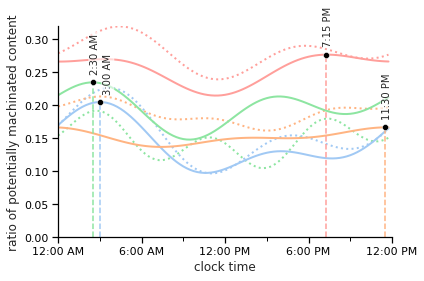

In [45]:
g =  fourier_utils.plot_difference(**ratio_args, usex="clock time")

g.get_figure().savefig(
    f"{config.SAVE_ROOT_DIR}{country_config.LABEL}_comparison_ratio_clocktime_Germany_vs_Italy_{ita_type}.eps")